In [ ]:
import pandas as pd # For data manupulation
import numpy as np # For numeric computation
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("creditcard.csv",delimiter=';')
df.head()

<ipython-input-2-183199ca6704>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("creditcard.csv",delimiter=';')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-13.598.071.336.738,-0.0727811733098497,253.634.673.796.914,137.815.522.427.443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
1,0,119.185.711.131.486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
2,1,-135.835.406.159.823,-134.016.307.473.609,177.320.934.263.119,0.379779593034328,-0.503198133318193,180.049.938.079.263,0.791460956450422,0.247675786588991,-151.465.432.260.583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
3,1,-0.966271711572087,-0.185226008082898,179.299.333.957.872,-0.863291275036453,-0.0103088796030823,124.720.316.752.486,0.23760893977178,0.377435874652262,-138.702.406.270.197,...,-0.108300452035545,0.00527359678253453,-0.190320518742841,-117.557.533.186.321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.50,0
4,2,-115.823.309.349.523,0.877736754848451,1.548.717.846.511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,-0.00943069713232919,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0


In [ ]:
df.shape


(284807, 31)

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


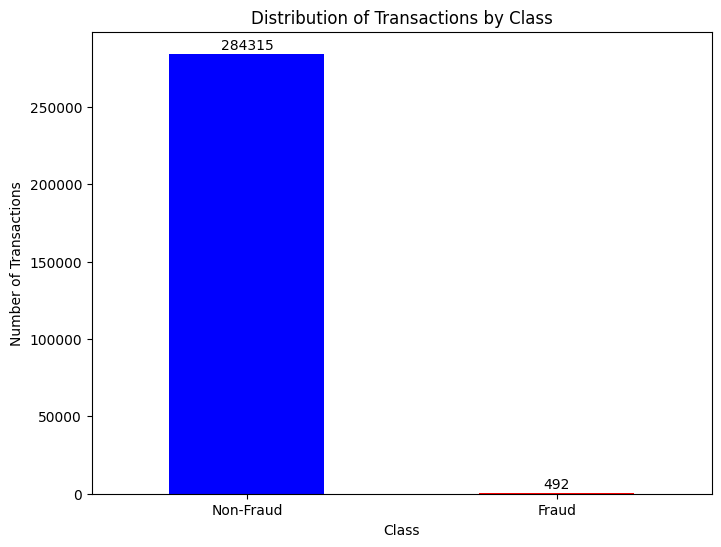

In [ ]:
# Count the number of fraud and non-fraud transactions
class_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Transactions by Class')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)

# Add count labels on top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
fraud_df= df[df['Class'] == 1]
non_fraud_df= df[df['Class']==0]
fraud_len= len(fraud_df)
non_fraud_sample= non_fraud_df.sample(n= 10*fraud_len, random_state= 1)

df= pd.concat([fraud_df, non_fraud_sample])
df = df.sample(frac=1, random_state=1).reset_index(drop=True)


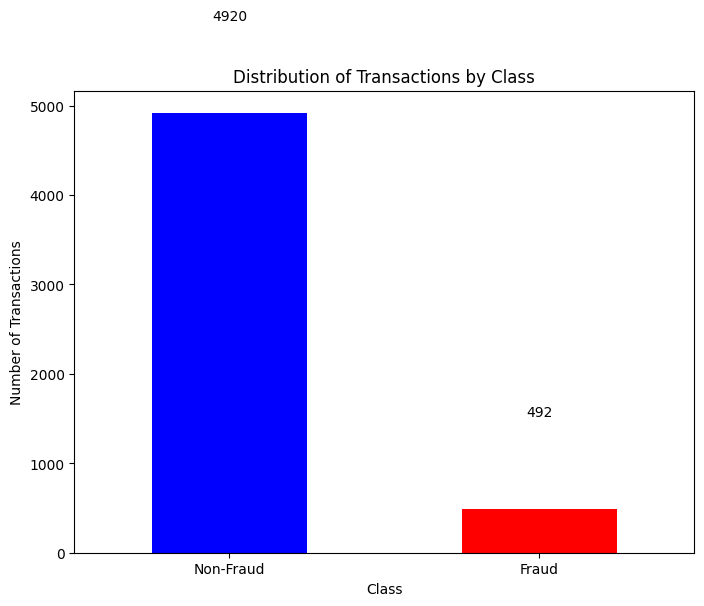

In [ ]:
# Count the number of fraud and non-fraud transactions
class_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Transactions by Class')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)

# Add count labels on top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')

plt.show()

In [ ]:


def convert_to_float(x):
    try:

        x = x.replace('.', '')
        return float(x)
    except ValueError:
        return np.nan  # or handle it as needed


for col in df.columns:
    if col not in ['Time', 'Class'] and df[col].dtype == object:
        df[col] = df[col].apply(convert_to_float)


print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5412 entries, 0 to 5411
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5412 non-null   object 
 1   V1      5412 non-null   float64
 2   V2      5412 non-null   float64
 3   V3      5411 non-null   float64
 4   V4      5410 non-null   float64
 5   V5      5412 non-null   float64
 6   V6      5411 non-null   float64
 7   V7      5412 non-null   float64
 8   V8      5411 non-null   float64
 9   V9      5412 non-null   float64
 10  V10     5412 non-null   float64
 11  V11     5412 non-null   float64
 12  V12     5411 non-null   float64
 13  V13     5411 non-null   float64
 14  V14     5411 non-null   float64
 15  V15     5411 non-null   float64
 16  V16     5412 non-null   float64
 17  V17     5412 non-null   float64
 18  V18     5412 non-null   float64
 19  V19     5412 non-null   float64
 20  V20     5410 non-null   float64
 21  V21     5410 non-null   float64
 22  

In [ ]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


print(df_imputed.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


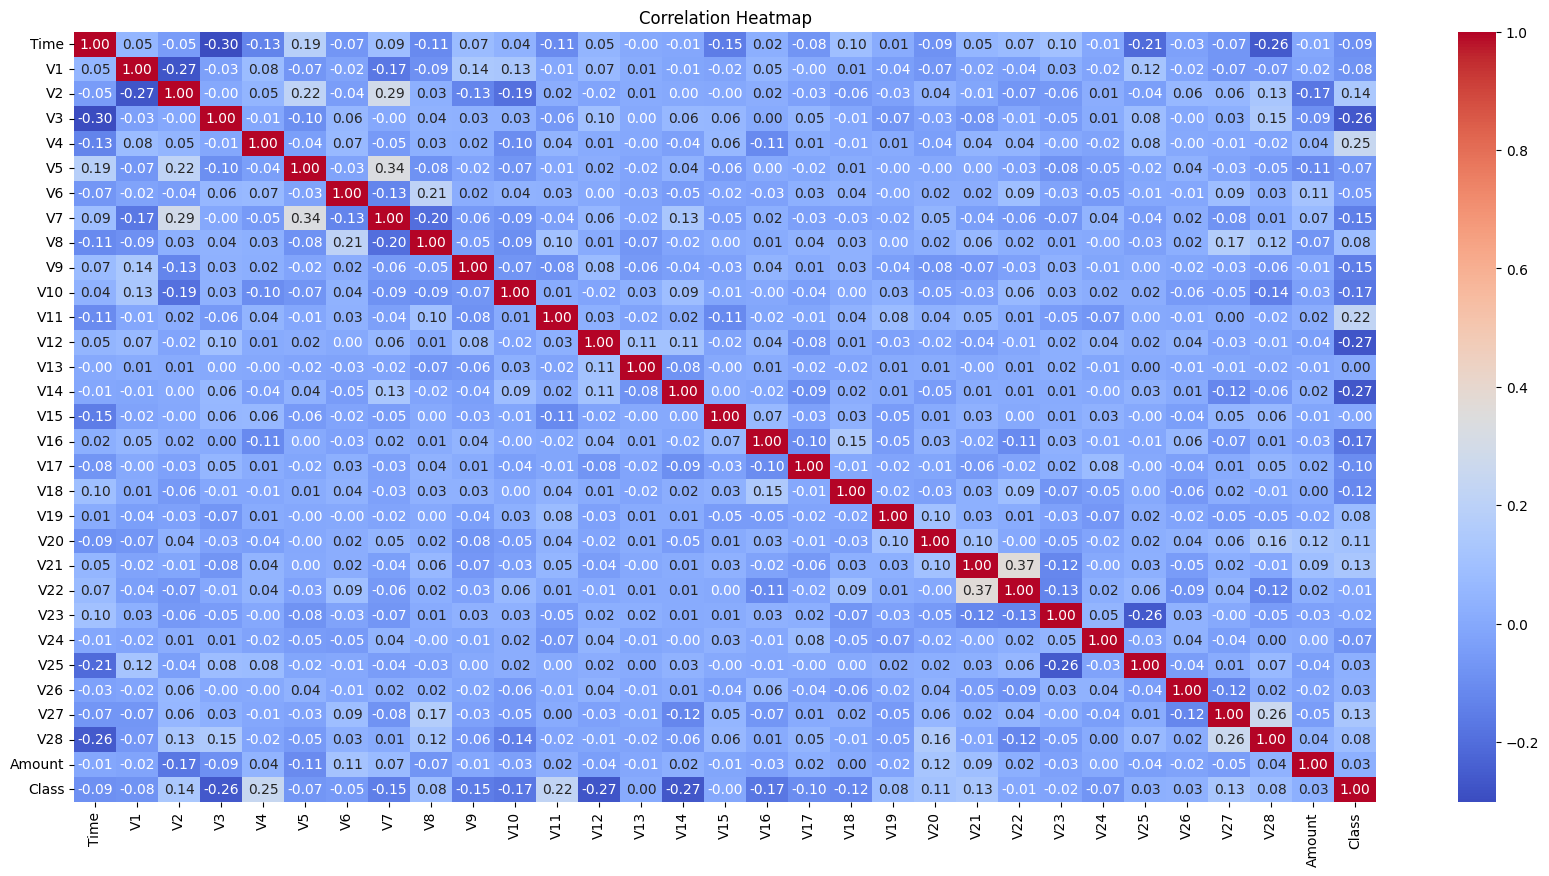

In [ ]:

correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(21, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
X = df.drop(['Time','Class'],axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:






# # Train a new model with the balanced dataset
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_smote, y_train_smote)

# # Predict probabilities
# y_scores = model.predict_proba(X_test)[:, 1]

# # Calculate precision-recall pairs for different thresholds
# precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# # Plot precision-recall curve
# plt.figure(figsize=(8, 6))
# plt.plot(thresholds, precision[:-1], label="Precision")
# plt.plot(thresholds, recall[:-1], label="Recall")
# plt.xlabel("Threshold")
# plt.ylabel("Score")
# plt.title("Precision-Recall vs. Threshold")
# plt.legend()
# plt.show()

# # Choose an optimal threshold based on your precision-recall trade-off
# optimal_threshold = 0.5  # Example threshold, adjust as needed
# y_pred_threshold = (y_scores >= optimal_threshold).astype(int)

# # Evaluating the model with the adjusted threshold
# print(classification_report(y_test, y_pred_threshold))

In [ ]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (3788, 29)
y_train -  (3788,)
X_test -  (1624, 29)
y_test -  (1624,)


In [ ]:

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

print("NaNs in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("NaNs in X_test_imputed:", np.isnan(X_test_imputed).sum())
print("Shape of X_train_imputed:", X_train_imputed.shape)
print("Shape of X_test_imputed:", X_test_imputed.shape)




NaNs in X_train_imputed: 0
NaNs in X_test_imputed: 0
Shape of X_train_imputed: (3788, 29)
Shape of X_test_imputed: (1624, 29)


In [ ]:

model = LogisticRegression(class_weight={0: 1, 1: 10})
model.fit(X_train_imputed, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 10})

In [ ]:

y_pred = model.predict(X_test_imputed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1481
           1       0.00      0.00      0.00       143

    accuracy                           0.91      1624
   macro avg       0.46      0.50      0.48      1624
weighted avg       0.83      0.91      0.87      1624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


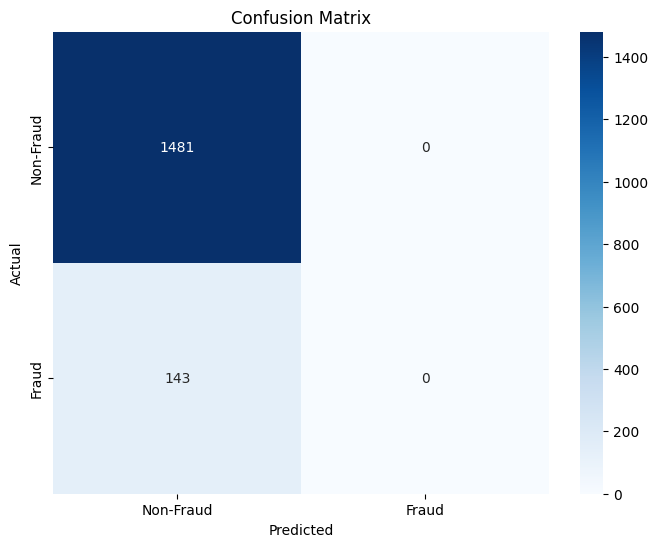

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:

param_grid = {
    'class_weight': [{0: 1, 1: w} for w in range(1, 51, 5)]  # Trying weights from 1 to 50 in steps of 5
}


model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)


grid_search.fit(X_train_imputed, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score}")

Best Parameters: {'class_weight': {0: 1, 1: 1}}
Best F1 Score: 0.33208223083887056


              precision    recall  f1-score   support

           0       0.98      0.67      0.79      1481
           1       0.20      0.89      0.33       143

    accuracy                           0.68      1624
   macro avg       0.59      0.78      0.56      1624
weighted avg       0.92      0.68      0.75      1624



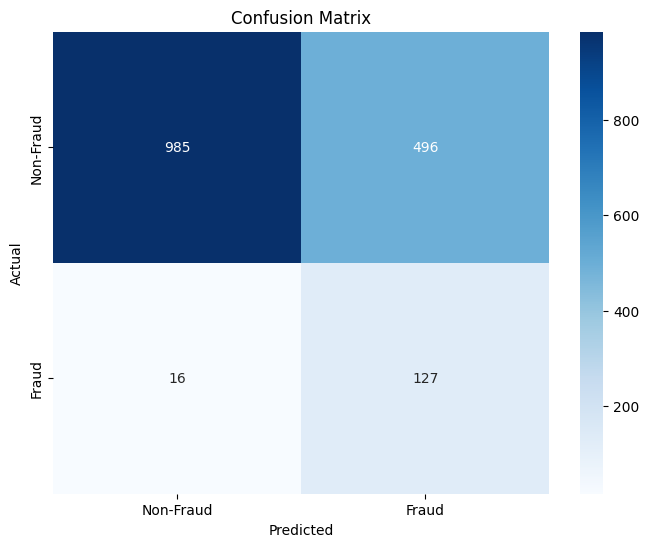

In [ ]:
# Fit the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_imputed, y_train)

# Predict and evaluate the model
y_pred = best_model.predict(X_test_imputed)
print(classification_report(y_test, y_pred))

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

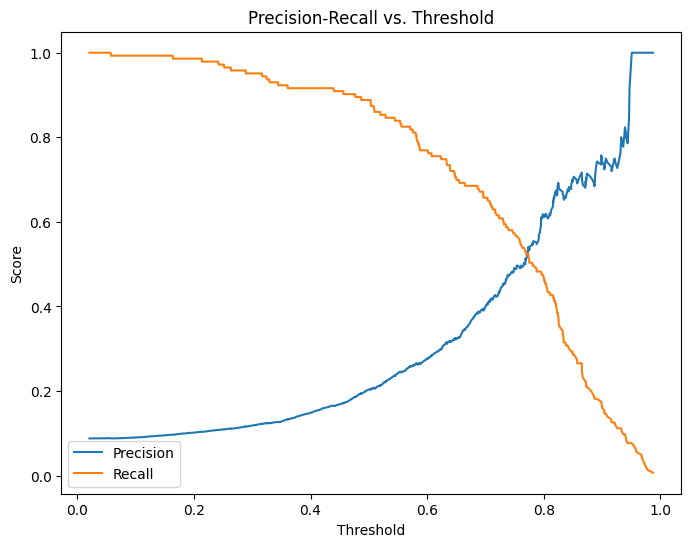

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_scores = best_model.predict_proba(X_test_imputed)[:, 1]

# Calculate precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.show()


In [ ]:

optimal_threshold = 0.7981000000

# Making predictions based on the optimal threshold
y_pred_threshold = (y_scores >= optimal_threshold).astype(int)

# Evaluating the model with the adjusted threshold
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1481
           1       0.62      0.48      0.54       143

    accuracy                           0.93      1624
   macro avg       0.78      0.72      0.75      1624
weighted avg       0.92      0.93      0.92      1624



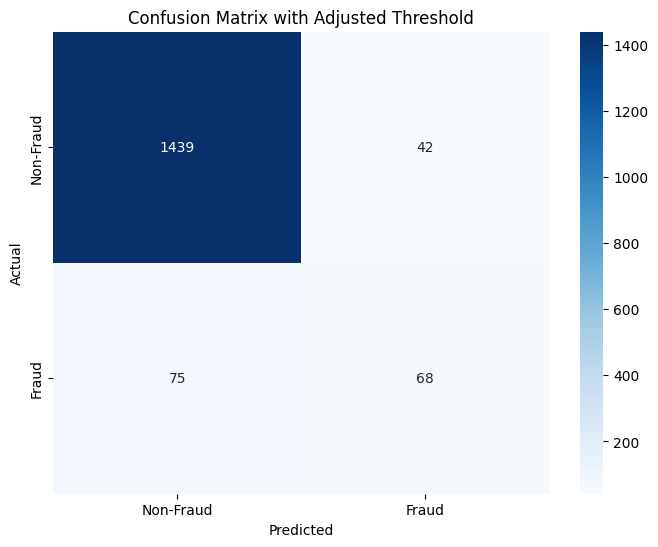

In [ ]:
# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Adjusted Threshold')
plt.show()

In [ ]:
pip install pyTsetlinMachine


In [ ]:
from pyTsetlinMachine.tm import MultiClassTsetlinMachine

# Preparung the data (ensuring it is binary)
# Converting our feature matrix to binary values (if not already in binary format)
X_train_binary = X_train_imputed > 0  # Example conversion to binary
X_test_binary = X_test_imputed > 0

# Initialize the Tsetlin Machine
tm = MultiClassTsetlinMachine(number_of_clauses=100, T=15, s=3.9)

# Train the Tsetlin Machine
tm.fit(X_train_binary, y_train, epochs=100)




In [ ]:
# Evaluate the Tsetlin Machine
y_pred_tm = tm.predict(X_test_binary)
print(classification_report(y_test, y_pred_tm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1481
           1       0.93      0.79      0.85       143

    accuracy                           0.98      1624
   macro avg       0.95      0.89      0.92      1624
weighted avg       0.98      0.98      0.98      1624



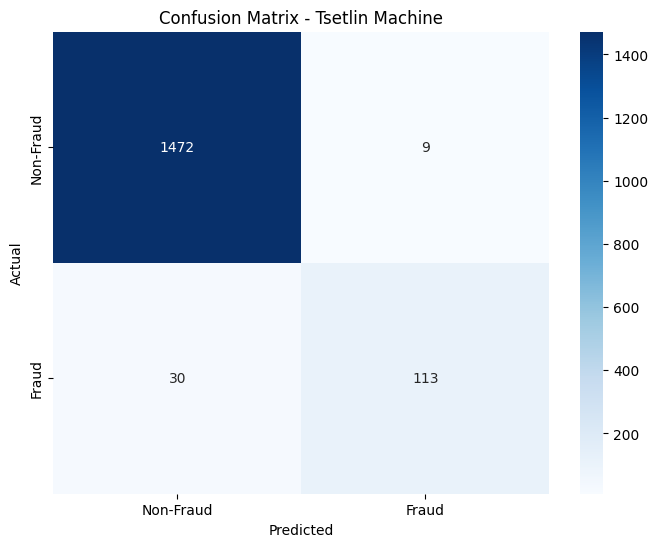

In [ ]:
# Compute and plot confusion matrix
conf_matrix_tm = confusion_matrix(y_test, y_pred_tm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tsetlin Machine')
plt.show()

## Grid search to find the better optimal threshold for the model


In [ ]:
from sklearn.model_selection import ParameterGrid
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Wrapper class for Tsetlin Machine to use with GridSearchCV
class TsetlinMachineClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, number_of_clauses=100, T=15, s=3.9, epochs=100):
        self.number_of_clauses = number_of_clauses
        self.T = T
        self.s = s
        self.epochs = epochs
        self.tm = MultiClassTsetlinMachine(self.number_of_clauses, self.T, self.s)

    def fit(self, X, y):
        self.tm.fit(X, y, epochs=self.epochs)
        return self

    def predict(self, X):
        return self.tm.predict(X)

# Preparinf the data (ensure it is binary)
X_train_binary = (X_train_imputed > 0).astype(int)
X_test_binary = (X_test_imputed > 0).astype(int)

# Defining the parameter grid
param_grid = {
    'number_of_clauses': [100, 200, 300],
    'epochs': [50, 100, 200],
    'T': [10, 15, 20],
    's': [3.0, 3.9, 5.0]
}

best_score = 0
best_params = None

# Perform Custom Grid Search
for params in ParameterGrid(param_grid):
    tm = TsetlinMachineClassifier(
        number_of_clauses=params['number_of_clauses'],
        epochs=params['epochs'],
        T=params['T'],
        s=params['s']
    )
    tm.fit(X_train_binary, y_train)
    y_pred = tm.predict(X_test_binary)
    score = accuracy_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_params = params

print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")



Best Score: 0.9839901477832512
Best Parameters: {'T': 15, 'epochs': 200, 'number_of_clauses': 300, 's': 3.0}


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1481
           1       0.94      0.83      0.88       143

    accuracy                           0.98      1624
   macro avg       0.96      0.91      0.93      1624
weighted avg       0.98      0.98      0.98      1624



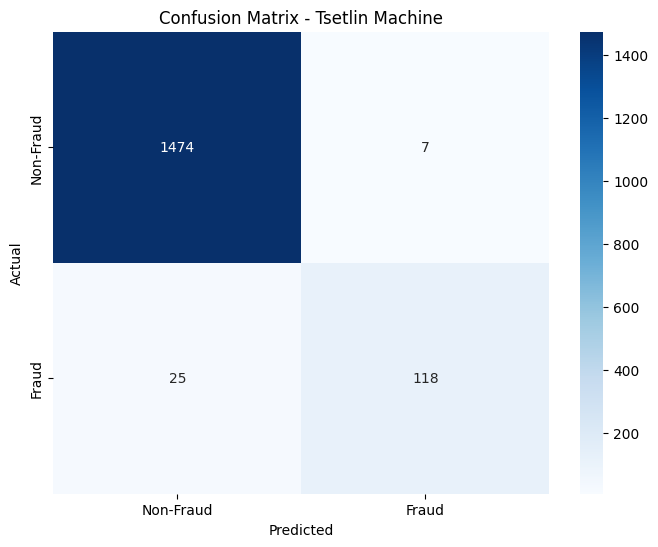

In [ ]:
# Train final model with the best parameters
tm_best = TsetlinMachineClassifier(
    number_of_clauses=best_params['number_of_clauses'],
    T=best_params['T'],
    s=best_params['s'],
    epochs=best_params['epochs']
)
tm_best.fit(X_train_binary, y_train)

# Evaluate the final model
y_pred_tm = tm_best.predict(X_test_binary)
print(classification_report(y_test, y_pred_tm))

# Compute and plot confusion matrix
conf_matrix_tm = confusion_matrix(y_test, y_pred_tm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tsetlin Machine')
plt.show()


## Interpretability of the Tsetlin Machine

In [ ]:
# Define the number of clauses to display
num_clauses_display = 10  # Adjust this number as needed
number_of_features=29

# Display significant clauses for each class
for class_label in range(2):  # Assuming binary classification
    print(f"\nClass {class_label} Positive Clauses:\n")
    for j in range(0, min(tm_best.tm.number_of_clauses, num_clauses_display), 2):
        print(f"Clause #{j}: ", end=' ')
        l = []
        for k in range(number_of_features * 2):
            if tm_best.tm.ta_action(class_label, j, k) == 1:
                if k < number_of_features:
                    l.append(f" x{k}")
                else:
                    l.append(f"¬x{k - number_of_features}")
        print(" ∧ ".join(l))

    print(f"\nClass {class_label} Negative Clauses:\n")
    for j in range(1, min(tm_best.tm.number_of_clauses, num_clauses_display), 2):
        print(f"Clause #{j}: ", end=' ')
        l = []
        for k in range(number_of_features * 2):
            if tm_best.tm.ta_action(class_label, j, k) == 1:
                if k < number_of_features:
                    l.append(f" x{k}")
                else:
                    l.append(f"¬x{k - number_of_features}")
        print(" ∧ ".join(l))





Class 0 Positive Clauses:

Clause #0:   x4 ∧  x17 ∧  x28 ∧ ¬x22
Clause #2:   x9
Clause #4:   x3 ∧  x24 ∧  x28 ∧ ¬x22
Clause #6:   x16 ∧  x28 ∧ ¬x15
Clause #8:   x1 ∧  x28 ∧ ¬x0

Class 0 Negative Clauses:

Clause #1:  ¬x2 ∧ ¬x9 ∧ ¬x11 ∧ ¬x15
Clause #3:   x16 ∧ ¬x10 ∧ ¬x25
Clause #5:  ¬x21
Clause #7:   x6 ∧  x21 ∧ ¬x8
Clause #9:   x14 ∧  x21 ∧ ¬x12

Class 1 Positive Clauses:

Clause #0:   x3 ∧  x4 ∧  x6 ∧  x10 ∧  x15
Clause #2:   x4 ∧  x10 ∧  x16 ∧ ¬x14
Clause #4:  ¬x1 ∧ ¬x10
Clause #6:   x1 ∧  x3 ∧ ¬x9 ∧ ¬x11 ∧ ¬x13
Clause #8:   x6 ∧  x11

Class 1 Negative Clauses:

Clause #1:   x13
Clause #3:   x0 ∧ ¬x19
Clause #5:  ¬x1 ∧ ¬x9
Clause #7:   x0 ∧ ¬x2 ∧ ¬x13
Clause #9:   x3 ∧  x28 ∧ ¬x11 ∧ ¬x12


## Checking with Random forest

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1481
           1       0.97      0.82      0.89       143

    accuracy                           0.98      1624
   macro avg       0.98      0.91      0.94      1624
weighted avg       0.98      0.98      0.98      1624



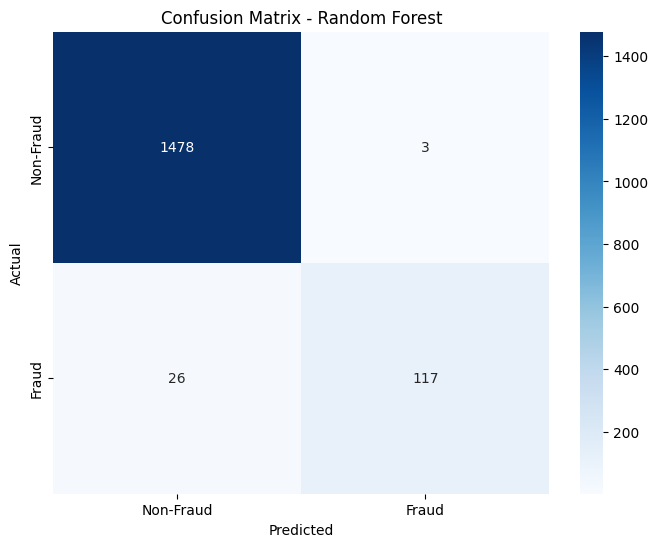

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Training the model
rf_model.fit(X_train_binary, y_train)

# Predicting and evaluating the model
y_pred_rf = rf_model.predict(X_test_binary)
print(classification_report(y_test, y_pred_rf))

# Computing and plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


##Hyperparameter tuning for the random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Now definding the parameter grid
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initializing the Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)


In [ ]:
#Here I will fit the grid search
grid_search_rf.fit(X_train_binary,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# To get the best parameters after
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_


In [ ]:
print(f"Best Score: {best_score_rf}")
print(f"Best Parameters: {best_params_rf}")


Best Score: 0.982047456583596
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1481
           1       0.98      0.85      0.91       143

    accuracy                           0.99      1624
   macro avg       0.98      0.93      0.95      1624
weighted avg       0.99      0.99      0.98      1624



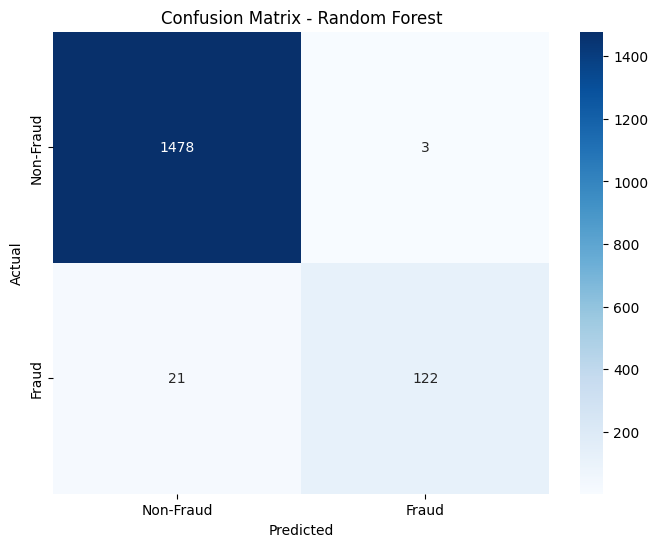

In [ ]:
# Training final model with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_features=best_params_rf['max_features'],
    bootstrap=best_params_rf['bootstrap'],
    random_state=42,
    class_weight='balanced'
)
rf_best.fit(X_train_binary, y_train)

# Evaluating the final model
y_pred_rf_best = rf_best.predict(X_test_binary)
print(classification_report(y_test, y_pred_rf_best))

# Computing and plot confusion matrix
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Summary of the entire findings


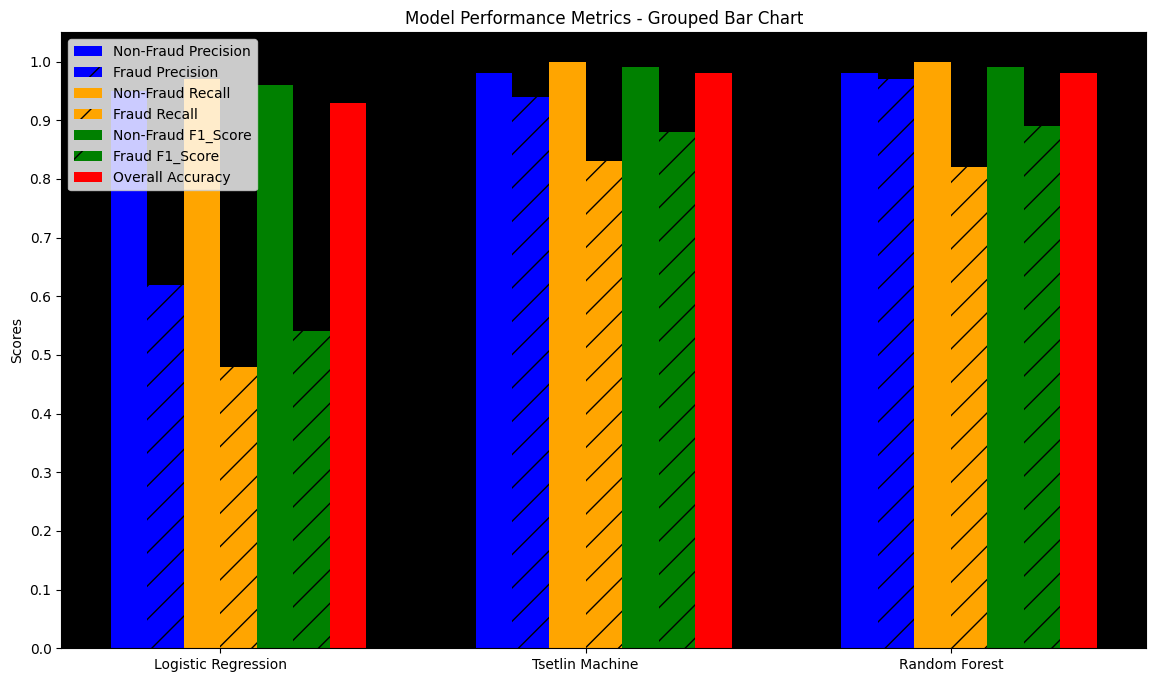

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
categories = ['Logistic Regression', 'Tsetlin Machine', 'Random Forest']
non_fraud_precision = [0.95, 0.98, 0.98]
fraud_precision = [0.62, 0.94, 0.97]
non_fraud_recall = [0.97, 1.00, 1.00]
fraud_recall = [0.48, 0.83, 0.82]
non_fraud_f1_score = [0.96, 0.99, 0.99]
fraud_f1_score = [0.54, 0.88, 0.89]
overall_accuracy = [0.93, 0.98, 0.98]

x = np.arange(len(categories))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('black')

bars1 = ax.bar(x - 2*width, non_fraud_precision, width, label='Non-Fraud Precision', color='blue')
bars2 = ax.bar(x - width, fraud_precision, width, label='Fraud Precision', color='blue', hatch='/')
bars3 = ax.bar(x, non_fraud_recall, width, label='Non-Fraud Recall', color='orange')
bars4 = ax.bar(x + width, fraud_recall, width, label='Fraud Recall', color='orange', hatch='/')
bars5 = ax.bar(x + 2*width, non_fraud_f1_score, width, label='Non-Fraud F1_Score', color='green')
bars6 = ax.bar(x + 3*width, fraud_f1_score, width, label='Fraud F1_Score', color='green', hatch='/')
bars7 = ax.bar(x + 4*width, overall_accuracy, width, label='Overall Accuracy', color='red')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics - Grouped Bar Chart')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Add more labels to the Y-axis
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()


In [ ]:
# Correct feature names excluding 'Time'
feature_names = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
                 'V28', 'Amount']

# Extract a single tree from the forest
tree = rf_best.estimators_[0]

# Export the tree to a dot file
export_graphviz(tree, out_file='tree.dot',
                feature_names=feature_names,
                class_names=['Non-Fraud', 'Fraud'],
                max_depth=3,
                rounded=True, proportion=False,
                precision=2, filled=True)

# Convert the dot file to a PNG file using graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("tree", format='png', cleanup=True)

# Display the image
from IPython.display import Image
Image(filename='tree.png')


NameError: name 'export_graphviz' is not defined